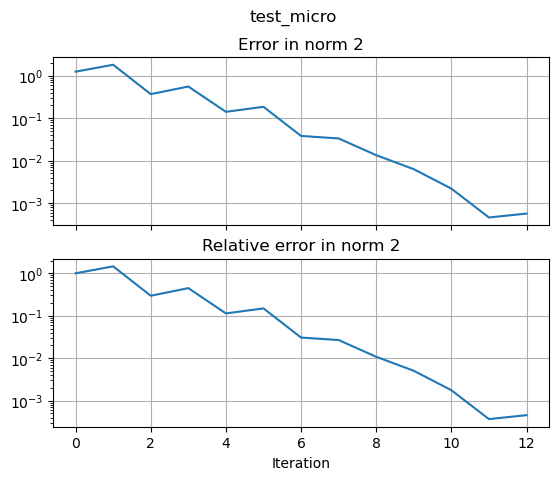

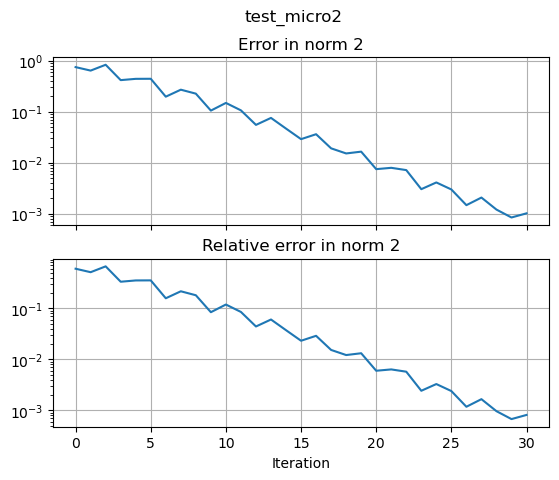

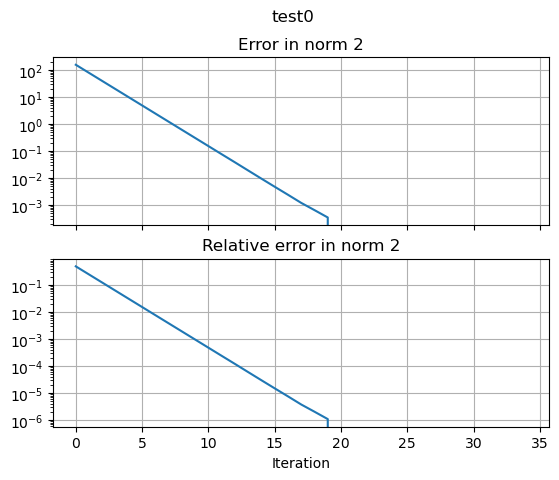

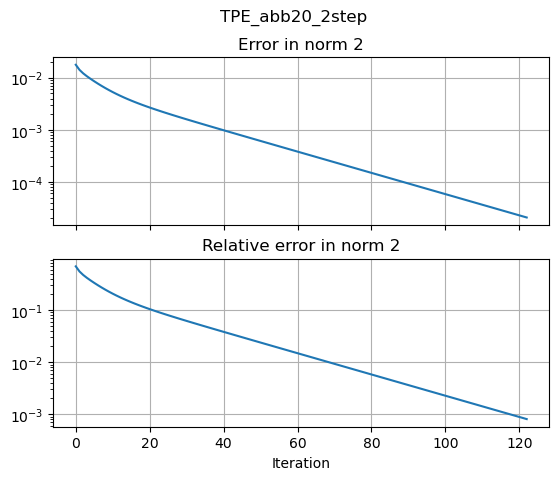

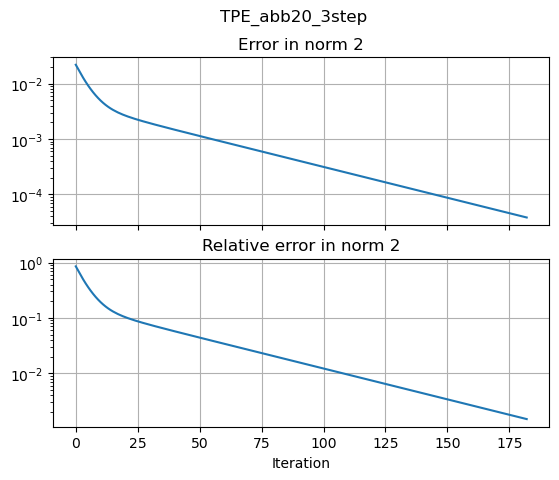

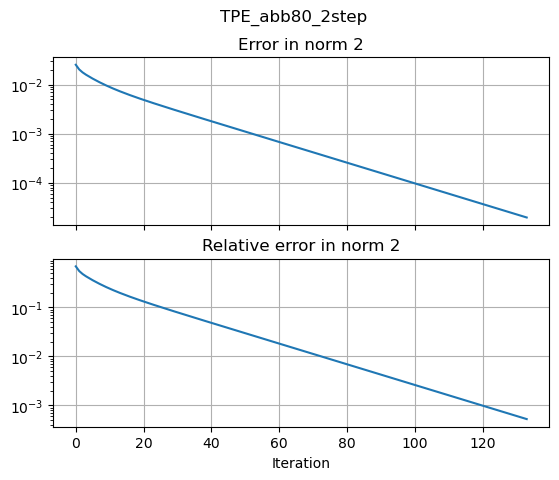

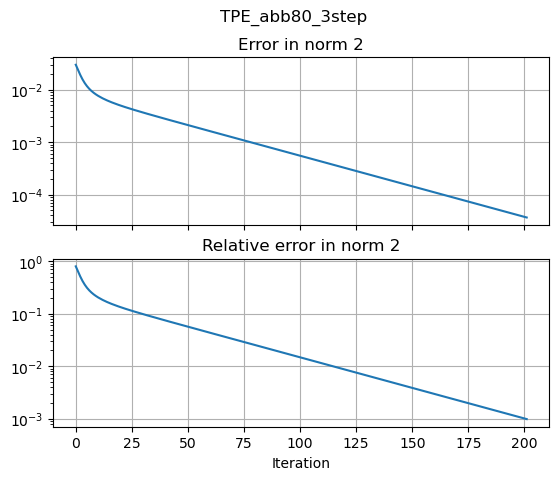

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np


path = "build/benchmarks/"

tests = ["TPE_abb20_2step","TPE_abb20_3step","TPE_abb80_2step","TPE_abb80_3step","TPE_abb320_2step","TPE_abb320_3step"]

for test in tests:
    truesol = path + test + "/gold.txt"

    with open(truesol) as f:
        truesol = f.readlines()

    truesol = np.array([float(x) for x in truesol])

    norm_of_sol = np.linalg.norm(truesol)

    # get the iterates, all the files starting with iter_

    iterates = [f for f in os.listdir(path + test) if f.startswith("iter_")]
    hist = []
    for i in iterates:
        with open(path + test + "/" + i) as f:
            iter = f.readlines()

        iter = np.array([float(x) for x in iter])
        hist.append(iter)

    # now we have the true solution and the iterates

    # compute the error in norm 2
    error = []
    rel_error = []
    for i in hist:
        error.append(np.linalg.norm(i - truesol))
        rel_error.append(np.linalg.norm(i - truesol) / norm_of_sol)


    # flip the error
    error = error[::-1]
    rel_error = rel_error[::-1]

    # sub plto the error
    fig, ax = plt.subplots(2, 1, sharex=True)

    ax[0].plot(error)
    ax[0].set_title("Error in norm 2")
    ax[0].set_yscale("log")
    ax[0].grid()

    ax[1].plot(rel_error)
    ax[1].set_title("Relative error in norm 2")
    ax[1].set_yscale("log")
    ax[1].grid()

    plt.xlabel("Iteration")
    plt.suptitle(test)
    
    plt.savefig(path + test + "/error.png")

    


